<a href="https://colab.research.google.com/github/Sanjay-K-2002/Speech_Emotion_MLP/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install librosa soundfile numpy scikit-learn pyaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


In [ ]:
!pip install soundfile

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [ ]:

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/MyDrive/Ravens/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [ ]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

Mounted at /content/drive
Files in Speech Directory: ['03-01-01-01-01-01-01.wav', 'Actor_01', 'Actor_02', 'Actor_05', 'Actor_04', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_24', 'Actor_03', 'Actor_02 (1)', 'Actor_08 (1)', 'Actor_10', 'Actor_15 (1)']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (85) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          01       0.86      0.32      0.46        19
          02       0.72      0.84      0.78        37
          03       0.70      0.65      0.67        43
          04       0.55      0.75      0.63        40
          05       0.84      0.72      0.78        29
          06       0.68      0.66      0.67        29
          07       0.76      0.50      0.60        32
          08       0.61      0.81      0.69        31

    accuracy                           0.68       260
   macro avg       0.71      0.66      0.66       260
weighted avg       0.70      0.68      0.67       260



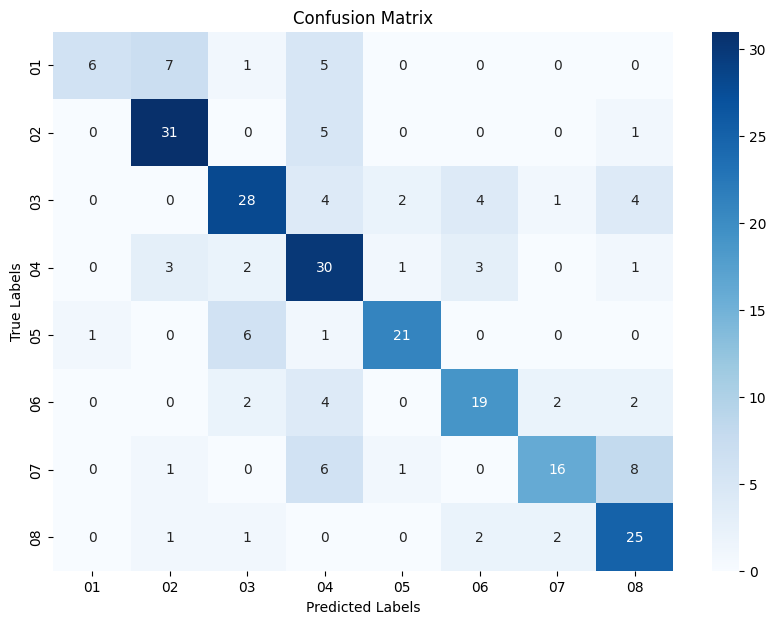

MLP Classifier Accuracy: 67.69%


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the correct directory path for speech data
speech_dir = '/content/drive/MyDrive/RAVDESS'  # Adjust if needed

# Verify the path and list contents
print("Files in Speech Directory:", os.listdir(speech_dir))

# Load data function
def load_data(directory):
    labels = []
    features = []

    # Loop through each actor's folder
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Loop through each file in the folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(folder_path, file_name)
                    emotion = file_name.split('-')[2]  # Extract emotion part from the file name

                    # Load audio file
                    X, sample_rate = librosa.load(file_path, sr=None)

                    # Extract features: MFCC, chroma, mel
                    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
                    chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate).T, axis=0)
                    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)

                    # Combine features into a single array
                    feature = np.hstack([mfccs, chroma, mel])

                    features.append(feature)
                    labels.append(emotion)

    return np.array(features), np.array(labels)

# Load speech data
X, y = load_data(speech_dir)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Multi-Layer Perceptron Classifier with specified parameters (20 epochs)
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=85)

# Train the MLP model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Classifier Accuracy: {accuracy * 100:.2f}%')


In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data function
def load_data(directory, max_pad_len=174):
    labels = []
    features = []

    for file_name in os.listdir(directory):
        if file_name.endswith('.wav'):
            file_path = os.path.join(directory, file_name)
            emotion = file_name.split('-')[2]  # Adjust based on filename convention

            X, sample_rate = librosa.load(file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
            chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
            mel = librosa.feature.melspectrogram(y=X, sr=sample_rate)

            if mfccs.shape[1] > max_pad_len:
                mfccs = mfccs[:, :max_pad_len]
                chroma = chroma[:, :max_pad_len]
                mel = mel[:, :max_pad_len]
            else:
                mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max_pad_len - mfccs.shape[1])), mode='constant')
                chroma = np.pad(chroma, pad_width=((0, 0), (0, max_pad_len - chroma.shape[1])), mode='constant')
                mel = np.pad(mel, pad_width=((0, 0), (0, max_pad_len - mel.shape[1])), mode='constant')

            feature = np.vstack([mfccs, chroma, mel])
            features.append(feature)
            labels.append(emotion)

    return np.array(features), np.array(labels)

# Path to the speech dataset
speech_dir = '/content/drive/MyDrive/RAVDESS'  # Update with your directory

# Load speech data
X, y = load_data(speech_dir)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Reshape X for CNN input
X = X[..., np.newaxis]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-2])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-2])).reshape(X_test.shape)

# CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=callbacks)

# Predict and evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Updated CNN Model Accuracy: {accuracy * 100:.2f}%')


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Number of samples loaded: 2057
Labels: ['01' '02' '03' '04' '05' '06' '07' '08']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 515s 39s/step - accuracy: 0.1815 - loss: 26.4490 - val_accuracy: 0.1650 - val_loss: 2.9831
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 552s 39s/step - accuracy: 0.1636 - loss: 4.3955 - val_accuracy: 0.1214 - val_loss: 3.1703
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 495s 38s/step - accuracy: 0.1815 - loss: 3.4008 - val_accuracy: 0.1238 - val_loss: 3.2069
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 489s 38s/step - accuracy: 0.1804 - loss: 3.2623 - val_accuracy: 0.1214 - val_loss: 3.1398
Epoch 5/50
11/13 ━━━━━━━━━━━━━━━━━━━━ 1:14 37s/step - accuracy: 0.1951 - loss: 3.1240

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Augmentation
def augment_data(X, y, max_pad_len=174):
    augmented_X = []
    augmented_y = []

    for i in range(len(X)):
        # Original audio features (no modification)
        augmented_X.append(X[i])
        augmented_y.append(y[i])

        # Add noise to the audio
        noise = np.random.randn(*X[i].shape) * 0.005
        augmented_X.append(np.clip(X[i] + noise, -1, 1))  # Clip to keep values in range [-1, 1]
        augmented_y.append(y[i])

        # Time shifting
        shift = np.random.randint(1, 5)
        shifted = np.roll(X[i], shift, axis=1)
        augmented_X.append(np.clip(shifted, -1, 1))
        augmented_y.append(y[i])

        # Stretching audio
        stretched = librosa.effects.time_stretch(X[i], rate=1.1)  # Slight time stretching
        # Ensure all augmented features are padded to max_pad_len
        if stretched.shape[1] > max_pad_len:
            stretched = stretched[:, :max_pad_len]
        else:
            stretched = np.pad(stretched, ((0, 0), (0, max_pad_len - stretched.shape[1])), mode='constant')

        augmented_X.append(stretched)
        augmented_y.append(y[i])

    return np.array(augmented_X), np.array(augmented_y)

# Load data function
def load_data(directory, max_pad_len=174, num_samples=100):
    labels = []
    features = []
    count = 0
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if count >= num_samples:  # Load only num_samples files
                break
            if file_name.endswith('.wav'):
                file_path = os.path.join(root, file_name)
                emotion = file_name.split('-')[2]  # Adjust based on filename convention

                # Load audio file
                X, sample_rate = librosa.load(file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=60)  # Increase n_mfcc
                chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
                mel = librosa.feature.melspectrogram(y=X, sr=sample_rate)
                spectral_contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)  # Add new feature

                # Pad or truncate features
                if mfccs.shape[1] > max_pad_len:
                    mfccs = mfccs[:, :max_pad_len]
                    chroma = chroma[:, :max_pad_len]
                    mel = mel[:, :max_pad_len]
                    spectral_contrast = spectral_contrast[:, :max_pad_len]
                else:
                    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max_pad_len - mfccs.shape[1])), mode='constant')
                    chroma = np.pad(chroma, pad_width=((0, 0), (0, max_pad_len - chroma.shape[1])), mode='constant')
                    mel = np.pad(mel, pad_width=((0, 0), (0, max_pad_len - mel.shape[1])), mode='constant')
                    spectral_contrast = np.pad(spectral_contrast, pad_width=((0, 0), (0, max_pad_len - spectral_contrast.shape[1])), mode='constant')

                # Combine features
                feature = np.vstack([mfccs, chroma, mel, spectral_contrast])  # Add spectral_contrast
                features.append(feature)
                labels.append(emotion)
                count += 1
    return np.array(features), np.array(labels)

# Path to the speech dataset
speech_dir = '/content/drive/MyDrive/RAVDESS'  # Update with your directory

# Load speech data
X, y = load_data(speech_dir)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Feature Scaling: Normalize the features (MFCCs, Chroma, Mel-spectrogram)
X = X - np.mean(X, axis=0)  # Centering the data
X = X / np.std(X, axis=0)   # Scaling to unit variance

# Data Augmentation
X_augmented, y_augmented = augment_data(X, y)

# Reshape X for CNN input
X_augmented = X_augmented[..., np.newaxis]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# CNN Model
model = models.Sequential([
    layers.InputLayer(input_shape=X_train.shape[1:]),  # Use InputLayer instead of input_shape in Conv2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),  # Use Global Average Pooling
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),  # Reduced dropout
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks - Save the best model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
]

# Train the model with 30 epochs
if len(X_train) > 0:  # Ensure training data is not empty
    model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

    # Predict and evaluate
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Updated CNN Model Accuracy: {accuracy * 100:.2f}%')
else:
    print("Training skipped due to insufficient data.")


Number of samples loaded: 100
Labels: ['01' '02' '03' '04' '05' '06' '07' '08']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - accuracy: 0.0750 - loss: 5.5855 - val_accuracy: 0.2500 - val_loss: 6.7662
Epoch 2/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - accuracy: 0.2625 - loss: 56.1622 - val_accuracy: 0.1500 - val_loss: 5.8220
Epoch 3/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - accuracy: 0.3750 - loss: 35.5453 - val_accuracy: 0.2500 - val_loss: 5.8820
Epoch 4/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.4750 - loss: 12.4000 - val_accuracy: 0.3500 - val_loss: 6.4589
Epoch 5/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - accuracy: 0.4625 - loss: 15.1994 - val_accuracy: 0.3500 - val_loss: 7.6148
Epoch 6/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.6000 - loss: 14.5497 - val_accuracy: 0.4000 - val_loss: 11.5718
Epoch 7/65
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.5750 - loss: 11.8605 - val_accuracy: 0.4000 - val_loss: 16.5906
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
              precision    recall  f1-score   support

   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


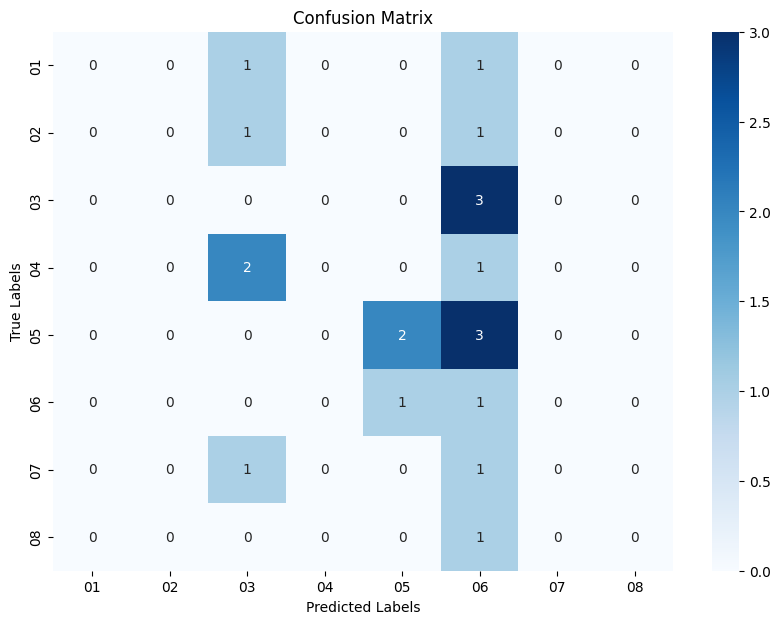

Updated CNN Model Accuracy: 15.00%


In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data function
def load_data(directory, max_pad_len=174, num_samples=100):
    labels = []
    features = []
    count = 0
    # Traverse through subdirectories and files
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if count >= num_samples:  # Load only num_samples files
                break
            if file_name.endswith('.wav'):
                file_path = os.path.join(root, file_name)
                emotion = file_name.split('-')[2]  # Adjust based on filename convention

                # Load audio file
                X, sample_rate = librosa.load(file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
                chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
                mel = librosa.feature.melspectrogram(y=X, sr=sample_rate)

                # Pad or truncate features to max_pad_len
                if mfccs.shape[1] > max_pad_len:
                    mfccs = mfccs[:, :max_pad_len]
                    chroma = chroma[:, :max_pad_len]
                    mel = mel[:, :max_pad_len]
                else:
                    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max_pad_len - mfccs.shape[1])), mode='constant')
                    chroma = np.pad(chroma, pad_width=((0, 0), (0, max_pad_len - chroma.shape[1])), mode='constant')
                    mel = np.pad(mel, pad_width=((0, 0), (0, max_pad_len - mel.shape[1])), mode='constant')

                # Combine features
                feature = np.vstack([mfccs, chroma, mel])
                features.append(feature)
                labels.append(emotion)
                count += 1
    return np.array(features), np.array(labels)

# Path to the speech dataset
speech_dir = '/content/drive/MyDrive/RAVDESS'  # Update with your directory

# Load speech data
X, y = load_data(speech_dir)

# Debug: Check the number of samples loaded
print(f"Number of samples loaded: {len(X)}")
print(f"Labels: {np.unique(y)}")

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Feature Scaling: Normalize the features (MFCCs, Chroma, Mel-spectrogram)
X = X - np.mean(X, axis=0)  # Centering the data
X = X / np.std(X, axis=0)   # Scaling to unit variance

# Reshape X for CNN input
X = X[..., np.newaxis]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=X_train.shape[1:]),  # Use InputLayer instead of input_shape in Conv2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# Train the model with 30 epochs
if len(X_train) > 0:  # Ensure training data is not empty
    model.fit(X_train, y_train, epochs=65, batch_size=128, validation_data=(X_test, y_test), callbacks=callbacks)

    # Predict and evaluate
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Updated CNN Model Accuracy: {accuracy * 100:.2f}%')
else:
    print("Training skipped due to insufficient data.")


In [ ]:
!apt-get install -y portaudio19-dev
!pip install pyaudio
!pip install resampy



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
portaudio19-dev is already the newest version (19.6.0-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.9 MB/s eta 0:00:00


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the path to your dataset
data_path = '/content/drive/MyDrive/RAVDESS'

# Initialize empty lists for features and labels
features = []
labels = []

# Define a function to extract features using librosa
def extract_features(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    # Extract MFCCs (Mel Frequency Cepstral Coefficients)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Return the mean of the MFCCs along the time axis
    return np.mean(mfccs.T, axis=0)

# Iterate through the dataset directory and process the audio files
for actor in os.listdir(data_path):
    actor_path = os.path.join(data_path, actor)
    if os.path.isdir(actor_path):
        for file in os.listdir(actor_path):
            if file.endswith('.wav'):
                file_path = os.path.join(actor_path, file)
                # Extract features and append them to the features list
                features.append(extract_features(file_path))
                # Extract label from the filename (assumes label is part of the filename)
                label = file.split('-')[2]  # Adjust the split logic based on your filename format
                labels.append(label)

# Convert features and labels into numpy arrays
features = np.array(features)
labels = np.array(labels)

# Encode the labels (converting them into numerical format)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))  # Number of classes in output layer

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=65, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the model after training
model.save('emotion_recognition_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.11/dist-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0560 - loss: 8.5859 - val_accuracy: 0.0615 - val_loss: 3.0910
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.0984 - loss: 3.0909 - val_accuracy: 0.0615 - val_loss: 3.0910
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0721 - loss: 3.0908 - val_accuracy: 0.0615 - val_loss: 3.0910
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0918 - loss: 3.0907 - val_accuracy: 0.0615 - val_loss: 3.0909
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.0784 - loss: 3.0905 - val_accuracy: 0.0615 - val_loss: 3.0909
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0920 - loss: 3.0904 - val_accuracy: 0.0615 - val_loss: 3.0909
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.0768 - loss: 3.0904 - val_accuracy: 0.0615 - val_loss: 3.0908
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0897 - loss: 3.0900 - val_accuracy: 0.0615 - val_loss:

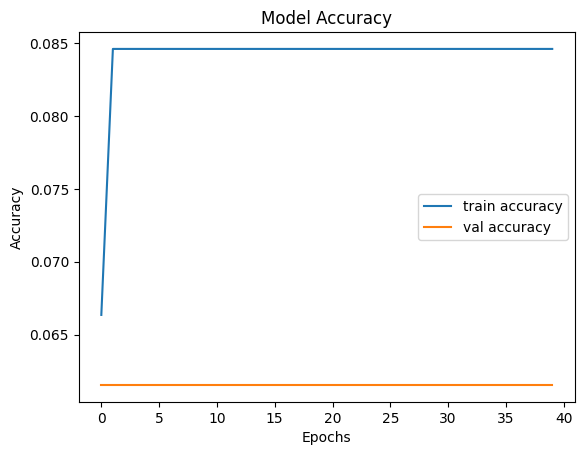

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to extract features from audio files
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, duration=2.5, sr=22050*2)

    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert Mel spectrogram to dB scale (logarithmic)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    return log_mel_spectrogram

# Load dataset
def load_data(data_dir):
    features = []
    labels = []

    # Read all files from the dataset directory
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)

        # If the path is a folder (emotions class), read all audio files in that folder
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(folder_path, file)
                    feature = extract_features(file_path)
                    features.append(feature)

                    # Use the folder name as the label (emotion class)
                    labels.append(folder)

    return np.array(features), np.array(labels)

# Prepare the data
data_dir = '/content/drive/MyDrive/RAVDESS'  # Path to your RAVDESS dataset
X, y = load_data(data_dir)

# Preprocess labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN (add a channel dimension)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer for the number of emotion classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
